In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

## Importing the Data and Preprocessing EDA

In [4]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML Assignments\STATISTICS\Clustering\EastWestAirlines.csv")

In [5]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
data = df.drop(['ID#','Balance'], axis = 1)
data.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,1,1,1,174,1,0,0,7000,0
1,0,1,1,1,215,2,0,0,6968,0
2,0,1,1,1,4123,4,0,0,7034,0
3,0,1,1,1,500,1,0,0,6952,0
4,0,4,1,1,43300,26,2077,4,6935,1


## Standerizing the Data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

In [11]:
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
scaled_df

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...
3994,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


## Creating Elbow Method

1. Use Elbow Graph to find optimum number of  clusters (K value) from K values range
2. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 

3. random state can be anything, but the same number to be used everytime,so that the results don't change.

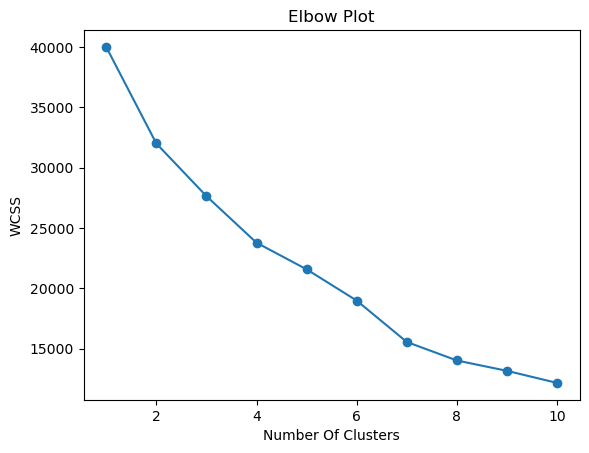

In [13]:
wcss = []


for i in range(1,11):
    kmeans = KMeans(n_clusters= i , random_state= 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss , marker = 'o')
plt.title('Elbow Plot')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Creating elbow method for 7 clusters


cluster_7 = KMeans(n_clusters=7 , random_state=15)
cluster_7.fit(scaled_df)

KMeans(n_clusters=7, random_state=15)

In [15]:
cluster_7.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [16]:
y_pred = cluster_7.predict(scaled_df)

In [17]:
y_pred

array([2, 2, 2, ..., 1, 2, 2])

In [18]:
scaled_df['Cluster'] = y_pred
scaled_df

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,2
1,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,2
2,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,2
3,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,2
4,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,6
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,2
3995,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,2
3996,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,1
3997,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,2


In [19]:
scaled_df.groupby('Cluster').mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,
0,6.852917,-0.018607,-0.098242,-0.062767,0.079293,0.073228,0.361235,0.397544,-0.118036,0.356247
1,-0.127479,0.460365,-0.098242,-0.058265,0.091061,0.533507,-0.153399,-0.166157,0.198872,0.064691
2,-0.129471,-0.740596,-0.098242,-0.060243,-0.589469,-0.707723,-0.189545,-0.206177,-0.250046,-0.388456
3,-0.084433,1.022084,-0.098242,15.646299,3.179691,1.714614,0.033293,0.059695,0.239873,0.337527
4,-0.156236,-0.668227,9.038254,-0.062767,-0.101665,0.617851,0.087549,0.220347,-0.072464,0.051784
5,0.356204,0.079535,-0.098242,-0.062767,0.590836,1.679070,3.804375,4.019862,0.246799,0.837251
6,-0.068219,1.718043,-0.098242,-0.053811,1.680234,0.934462,-0.011281,0.005211,0.441807,0.992568


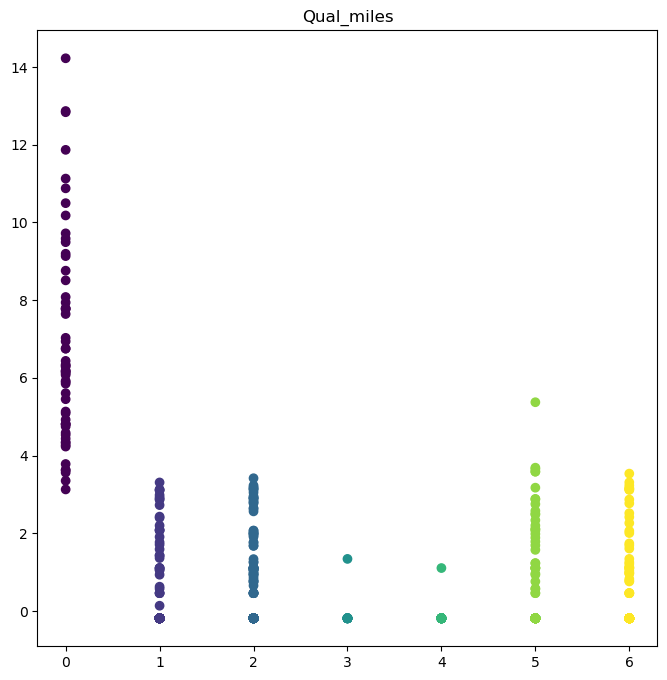

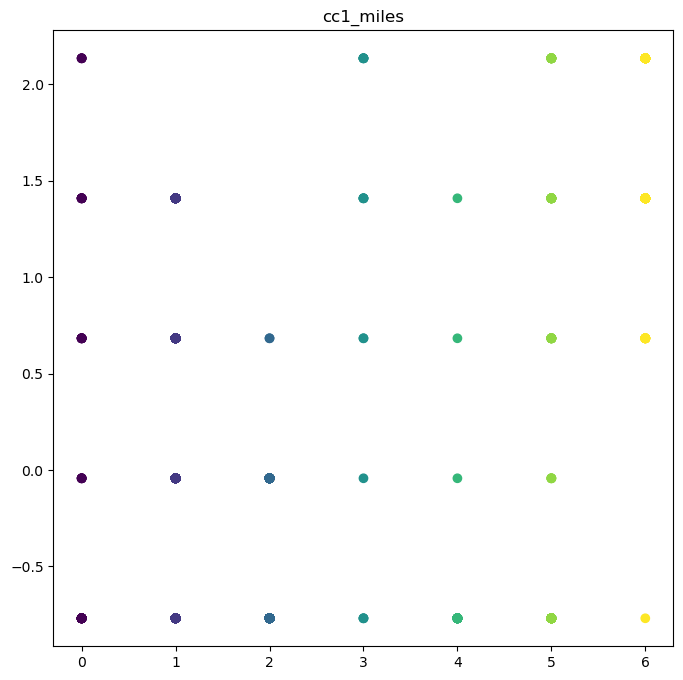

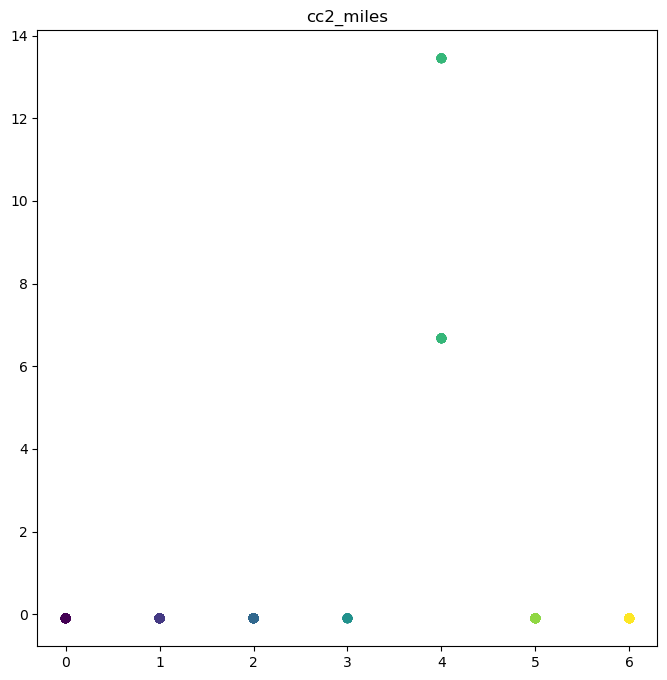

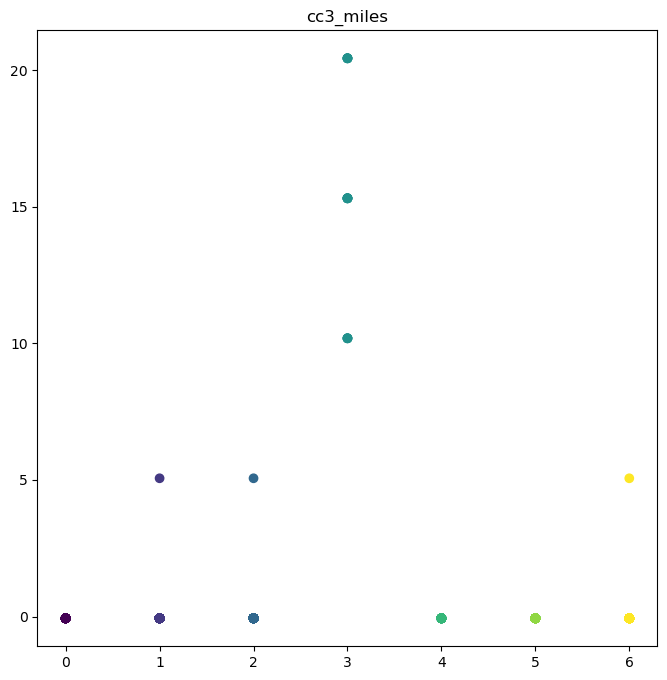

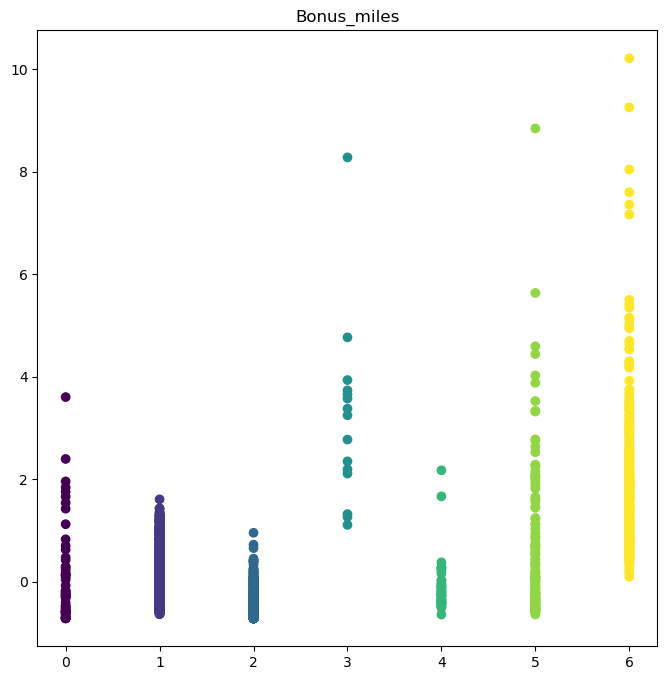

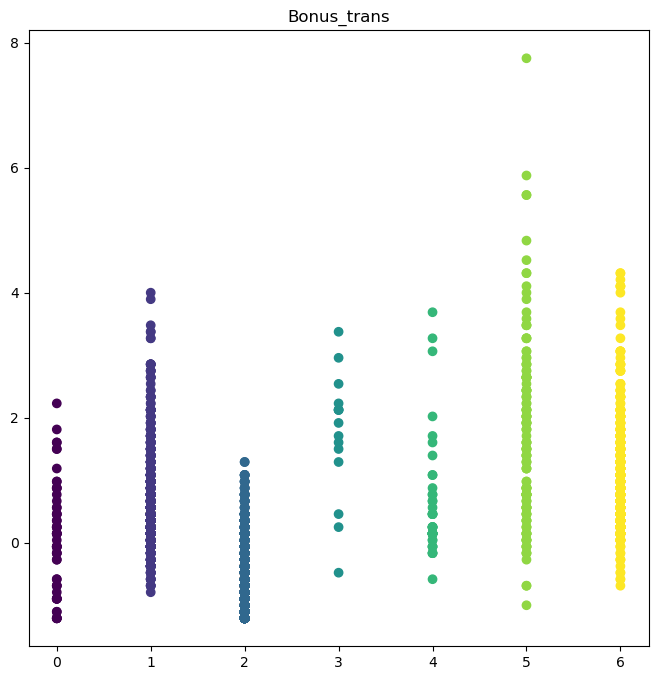

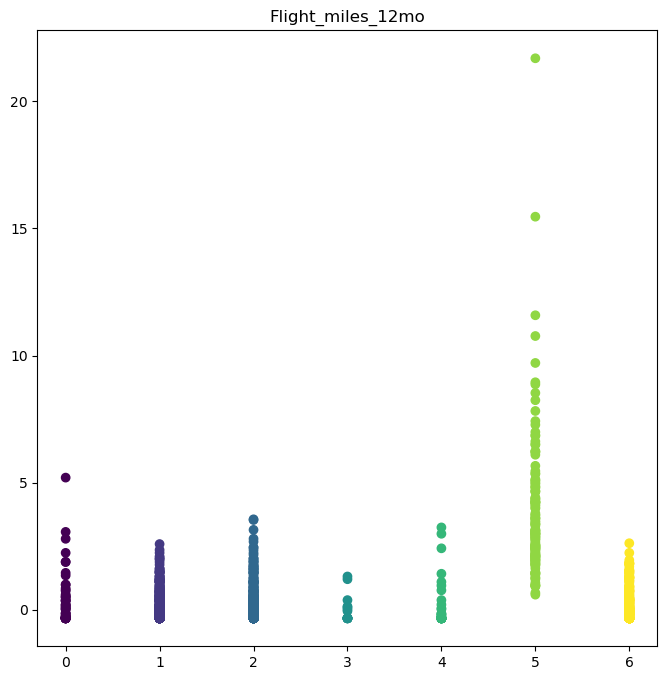

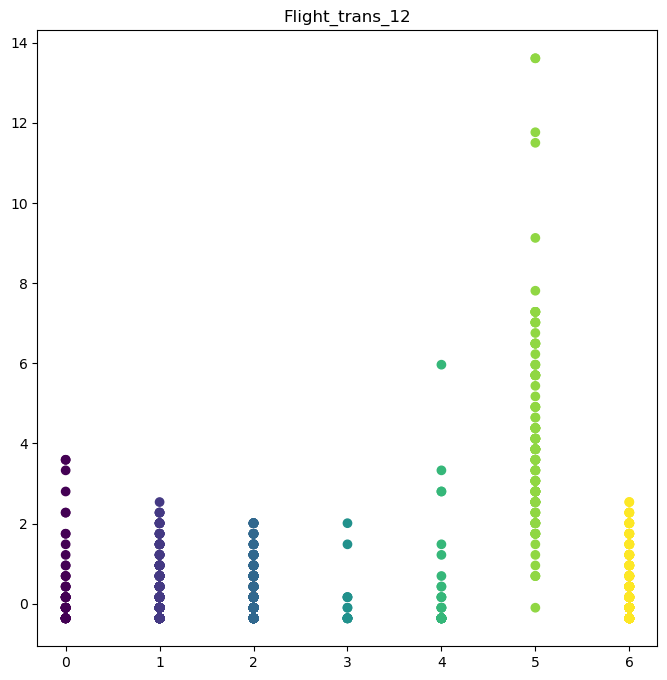

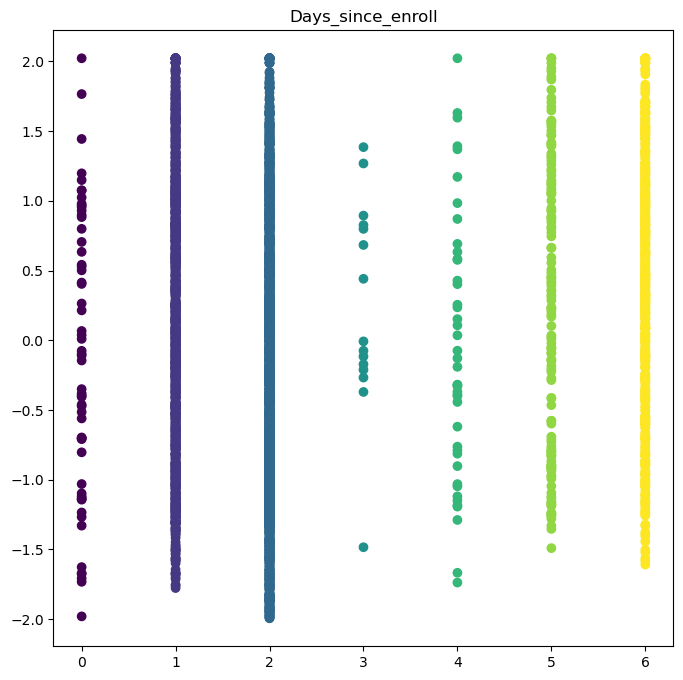

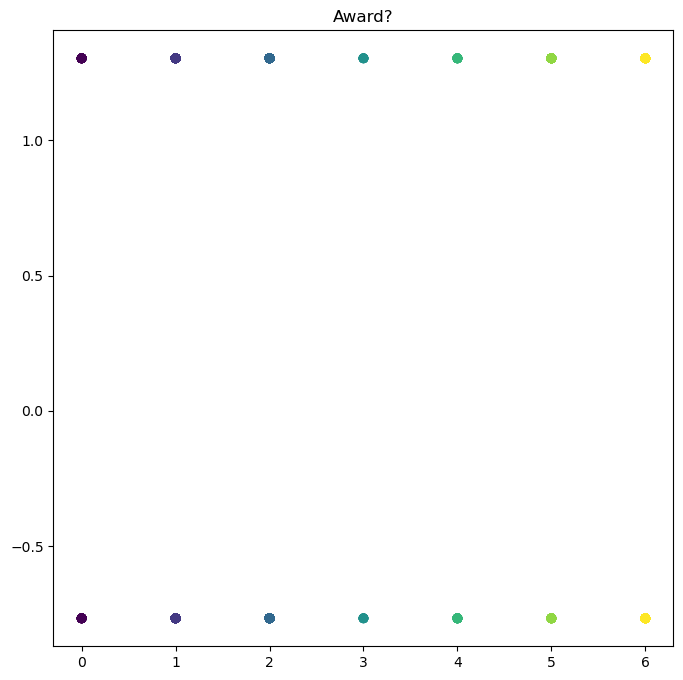

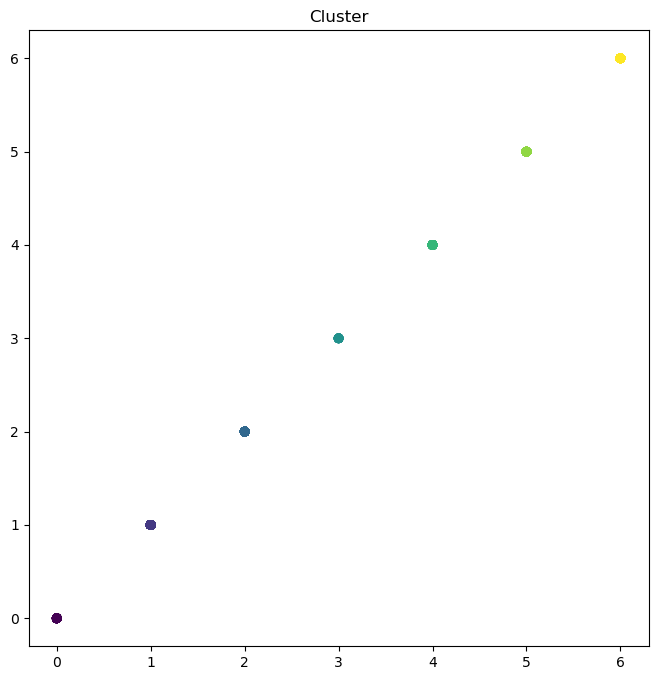

In [20]:
for i in scaled_df.columns:
    plt.figure(figsize = (8,8))
    plt.scatter(data=scaled_df , x = 'Cluster' , y = i ,  c = cluster_7.labels_)
    plt.title(i)
    plt.show()